# KUNSKAPSKONTROLL SQL DS24 <BR><BR>
## TEORETISKA FRÅGOR

#### 1. Beskriv kort hur en relationsdatabas fungerar.
Svar: en relationsdatabas är i all sin enkla komplicitet en databas med flera tabeller som kan ha överlappande information. Genom att föra samman dessa "relationer" så kan vi få fram relevant information precis som vi vill ha den, utan tomma tabeller eller extra arbete. Exempelvis kan ett KundID användas för att "joina" samman kunddata mot orderdata samt föreslagvis även produktdata baserat på ProduktID i detta fallet.

#### 2. Vad menas med “CRUD”-flödet?
Svar: CRUD står för "Create, Read, Update, Delete", det vill säga "Skapa, läs, uppdatera, radera". Detta beskriver arbetet med en databas på ett tillfredställande sätt. Ett grundläggande arbetssätt som täcker in majoriteten av de olika aktioner en kan ta inom ramen för arbetet.

#### 3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
SVAR: En "Left join" tar med samtliga rader from den vänstra tabellen och kombinerar med matchande i den högra, medan en inner join enbart tar med "snittet" - kontaktytan mellan båda dessa tabeller. Högst användbart i en relationsdatabas, faktiskt grundbulten i det hela. Joins-systemet styr hur vi väljer att sammanfoga och visualisera datan.

#### 4. Beskriv kort vad indexering i SQL innebär.
SVAR: Vad gäller indexering i SQL är ett (gammalt) bibliotek en bra analogi. Istället för att söka igenom hela biblioteket, bok för bok, så använder biblotikarien lättillgängliga högar med kort om böckerna, sorterade utifrån Titel, Författare, osv. Sökningen går otroligt mycket snabbare, och rätt information nås till en bråkdel av tiden, speciellt i ett tillräckligt stort "bibliotek".

#### 5. Beskriv kort vad en vy i SQL är.
SVAR: En "vy" skapar med hjälp av en query en virtuell tabell som sedan kan användas och återanvändas utan att behöva köra queryn flera gånger, och kan därför ge bättre prestanda. Den ger även möjligheter att begränsa vilken information som skall ges vidare, till exempel vid säkerhetsrestriktioner för eventuella mottagare. 

#### 6. Beskriv kort vad en lagrad procedur i SQL är.
SVAR: En lagrad procedur i SQL är en färdigskriven kod som går att använda lättillgängligt, vilket är otroligt händigt om just en specifik kodsnutt är något som används till exempel 134 gånger på kort tid. Genom att ha ett kortare kommando för detta kan enormt mycket tid sparas.
<BR><BR><BR>

## PROGRAMMERINGSUPPGIFT
Databasen AdventureWorks2022 är en relationsdatabas över ett fiktivt bolag som säljer produkter inom fyra kategorier: cyklar, komponenter, kläder, och tillbehör. Nedan följer en beskrivning av schemas och tabeller samt relationerna mellan dessa. Relationerna kan bestå av t.ex. att både Sales.SalesOrderDetail och Production.ProductionCostHistory vilka båda innehåller tabellen ProductID och därigenom kan länkas och fogas samman på olika vis.

Nedan importerar jag nödvändiga bibliotek och koppling till SQL och databasen AdventureWorks2022 skapas.

In [1]:
from sqlalchemy import create_engine, URL, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import ttest_ind
import seaborn as sns

SERVER = 'localhost' 
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)

connection = engine.connect()

Databasen innehåller flera s.k. schemas, vilka grupperar och representerar olika aspekter av verksamhetens data. Inom dessa finns sedan relaterad data i form av tabeller. Nedan listar jag först samtliga, sedan kan vi se de olika tabellerna i schema "Human Resources", "Person", "Production" och "Sales". Dessa kan sedan användas för att få en god överblick över befintlig data och vad varje schema och tabell hanterar.

In [2]:
inspector = inspect(engine)

# Hämta alla schemas
schemas = inspector.get_schema_names()
print("Scheman i databasen:")
for schema in schemas:
    print(schema)


# Skriv ut viktiga schemas
specific_schemas = ['HumanResources', 'Person', 'Production', 'Sales',]
for schema in specific_schemas:
    print(f"\nTabeller i schema '{schema}':")
    tables = inspector.get_table_names(schema=schema)
    for table in tables:
        print(table)


Scheman i databasen:
db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys

Tabeller i schema 'HumanResources':
Department
Employee
EmployeeDepartmentHistory
EmployeePayHistory
JobCandidate
Shift

Tabeller i schema 'Person':
Address
AddressType
BusinessEntity
BusinessEntityAddress
BusinessEntityContact
ContactType
CountryRegion
EmailAddress
Password
Person
PersonPhone
PhoneNumberType
StateProvince

Tabeller i schema 'Production':
BillOfMaterials
Culture
Document
Illustration
Location
Product
ProductCategory
ProductCostHistory
ProductDescription
ProductDocument
ProductInventory
ProductListPriceHistory
ProductModel
ProductModelIllustration
ProductModelProductDescriptionCulture
ProductPhoto
ProductProductPhoto
ProductReview
ProductSubcategory
ScrapReason
TransactionHistory
TransactionHistoryArchive
UnitMeasure
WorkOrder
WorkOrd

Utöver detta kan jag även gå djupare i datan genom att lista kolumnerna i en tabell. Här nedan exempelvis från schema Sales och dess tabell SalesOrderDetail. Denna tabell ger exempelvis information om ordrar, ID på vilken produkt som har beställts, kvantitet samt pris. Här följer tabellens fem första rader samt ett diagram över hur många artiklar som köps vid en order. Vi kan i diagrammet se att det är en överväldigande majoritet av ordrarna som endast innehåller en artikel, vilket kan vara intressant vid ett utforskande av databasen.

Exempel från tabellen SalesOrderDetail:
   SalesOrderID  SalesOrderDetailID CarrierTrackingNumber  OrderQty  \
0         43659                   1          4911-403C-98         1   
1         43659                   2          4911-403C-98         3   
2         43659                   3          4911-403C-98         1   
3         43659                   4          4911-403C-98         1   
4         43659                   5          4911-403C-98         1   

   ProductID  SpecialOfferID  UnitPrice  UnitPriceDiscount  LineTotal  \
0        776               1   2024.994                0.0   2024.994   
1        777               1   2024.994                0.0   6074.982   
2        778               1   2024.994                0.0   2024.994   
3        771               1   2039.994                0.0   2039.994   
4        772               1   2039.994                0.0   2039.994   

                                rowguid ModifiedDate  
0  B207C96D-D9E6-402B-8470-2CC176C42283

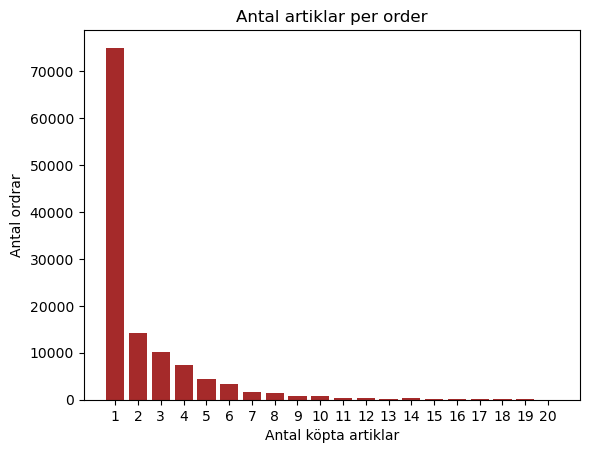

In [3]:
query = """
SELECT TOP 5 *
FROM Sales.SalesOrderDetail
"""

order_data = pd.read_sql(query, engine)
print("Exempel från tabellen SalesOrderDetail:")
print(order_data)

# Uppdaterad query, antal beställningar per OrderQty
# Gränssättning <=20 för läsbarhet
query_sales = """
SELECT
    OrderQty, COUNT(*) AS AmountBought
FROM Sales.SalesOrderDetail
WHERE OrderQty <= 20
GROUP BY OrderQty
ORDER BY OrderQty DESC
"""

amount_data = pd.read_sql(query_sales, engine)

# Stapeldiagram, antal artiklar per order
plt.bar(amount_data['OrderQty'], amount_data['AmountBought'], color='brown')

plt.xticks(range(min(amount_data['OrderQty']), max(amount_data['OrderQty']) + 1)) # Endast heltal på x-axeln
plt.xlabel('Antal köpta artiklar')
plt.ylabel('Antal ordrar')
plt.title('Antal artiklar per order')

plt.show()


Nedan visas verksamhetens olika produktkategorier, samt antal artiklar i dessa. Detta ger en överblick över sortimentet och dess innehåll. Vi kan till exempel se att komponenter och cyklar är mångdubbelt större i antal än tillbehör och kläder.

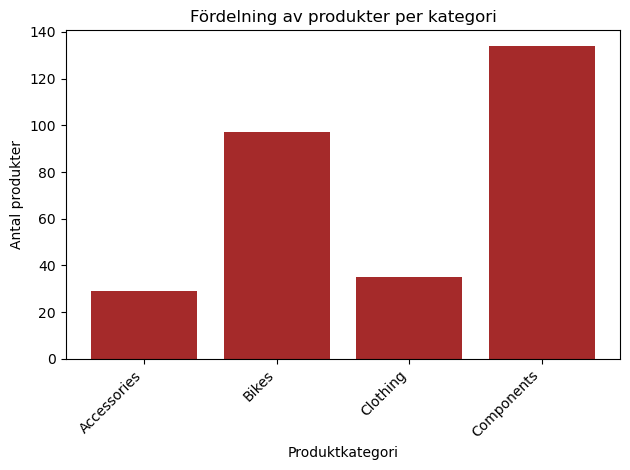

In [4]:
# Produkter per kategori
query = """
SELECT 
    pc.ProductCategoryID, 
    pc.Name AS ProductCategoryName, 
    COUNT(*) AS ProductCount
FROM Production.Product AS p
INNER JOIN Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.ProductCategoryID, pc.Name
"""
category_data = pd.read_sql(query, engine)

# Sortera efter namn
category_data = category_data.sort_values('ProductCategoryName')

# Stapeldiagram
plt.bar(category_data['ProductCategoryName'], category_data['ProductCount'], color='brown')
plt.xlabel("Produktkategori")
plt.ylabel("Antal produkter")
plt.title("Fördelning av produkter per kategori")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Grafen nedan visar total månatlig försäljning över tid, i den kan vi se tydliga rörelser mellan månaderna i fråga, men inget större säsongsbetonat mönster.

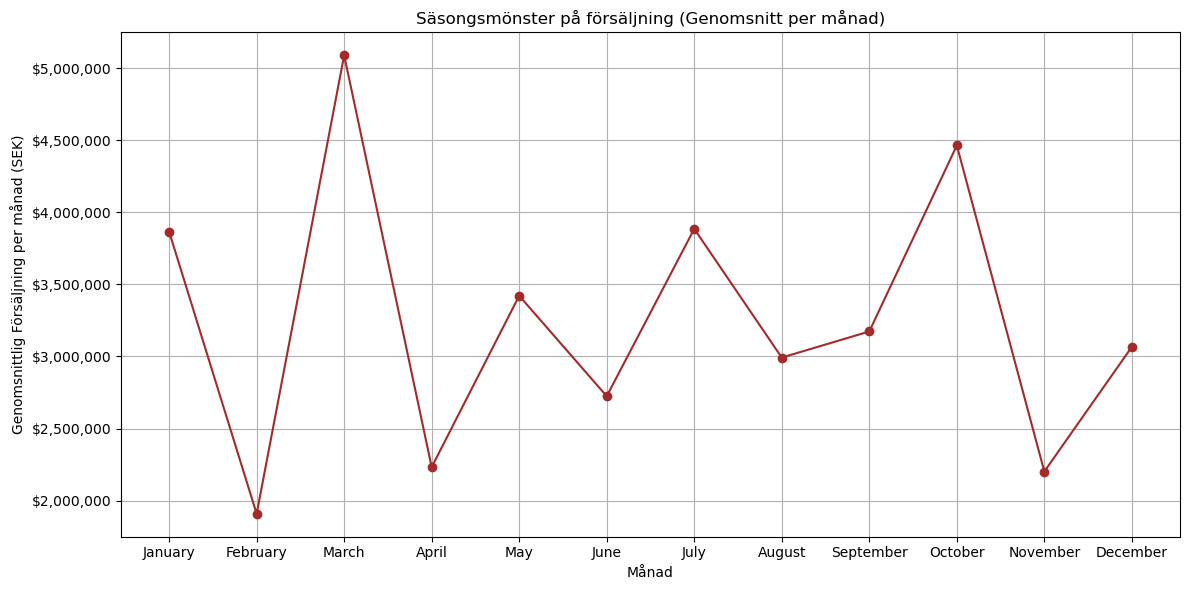

In [5]:
query = """
SELECT 
    YEAR(OrderDate) AS Year,
    MONTH(OrderDate) AS Month,
    SUM(TotalDue) AS TotalSales
FROM Sales.SalesOrderHeader AS soh
GROUP BY YEAR(OrderDate), MONTH(OrderDate)
ORDER BY Year, Month
"""
sales_data = pd.read_sql(query, engine)

# Skapa kolumn för år-månad
sales_data['YearMonth'] = pd.to_datetime(sales_data['Year'].astype(str) + '-' + sales_data['Month'].astype(str), format='%Y-%m')

# Kolumn för enbart månad
sales_data['MonthName'] = sales_data['YearMonth'].dt.month_name()


# Dataaggregation med .groupby() grupperar efter månadens namn, över flera år.
# .mean() tar ut genomsnittliga värdet. .reset_index() omvandlar från gruppstruktur till tabell.
monthly_sales = sales_data.groupby('MonthName')['TotalSales'].mean().reset_index()
monthly_sales = monthly_sales.set_index('MonthName').reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Definiera valutaformat
def currency_format(x, pos):
    return f"${x:,.0f}"

# Skriv ut säsongsmönster
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales['TotalSales'], marker='o', color='brown')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.xlabel("Månad")
plt.ylabel("Genomsnittlig Försäljning per månad (SEK)")
plt.title("Säsongsmönster på försäljning (Genomsnitt per månad)")
plt.grid(True)
plt.tight_layout()
plt.show()


Cirkeldiagrammet nedan visar fördelningen mellan de olika produktkategorierna i försäljning. Cyklar är den otvivelaktigt största kategorin.

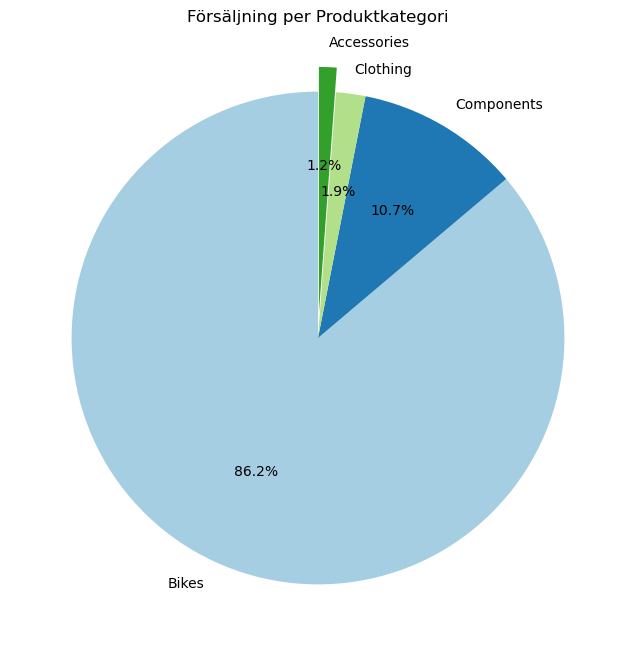

In [6]:
# SQL-auery
query = """
SELECT pc.Name AS Category, SUM(sod.LineTotal) AS TotalSales
FROM Sales.SalesOrderDetail sod
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductSubcategory AS psc ON p.ProductSubcategoryID = psc.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON psc.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name
ORDER BY TotalSales DESC;
"""

data = pd.read_sql(query, engine)

# Cirkeldiagram
# "Explode" accessories för läsbarhet
explode = [0.1 if category == 'Accessories' else 0 for category in data['Category']]

plt.figure(figsize=(8, 8))
plt.pie(
    data['TotalSales'], 
    labels=data['Category'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors,
    explode=explode
)

plt.title('Försäljning per Produktkategori')
plt.show()

#### DATAINTEGRITET
För att undersöka datans integritet gör jag först en kontroll på om hela årets bokslut är med i datan samt om det finns några avvikelser.

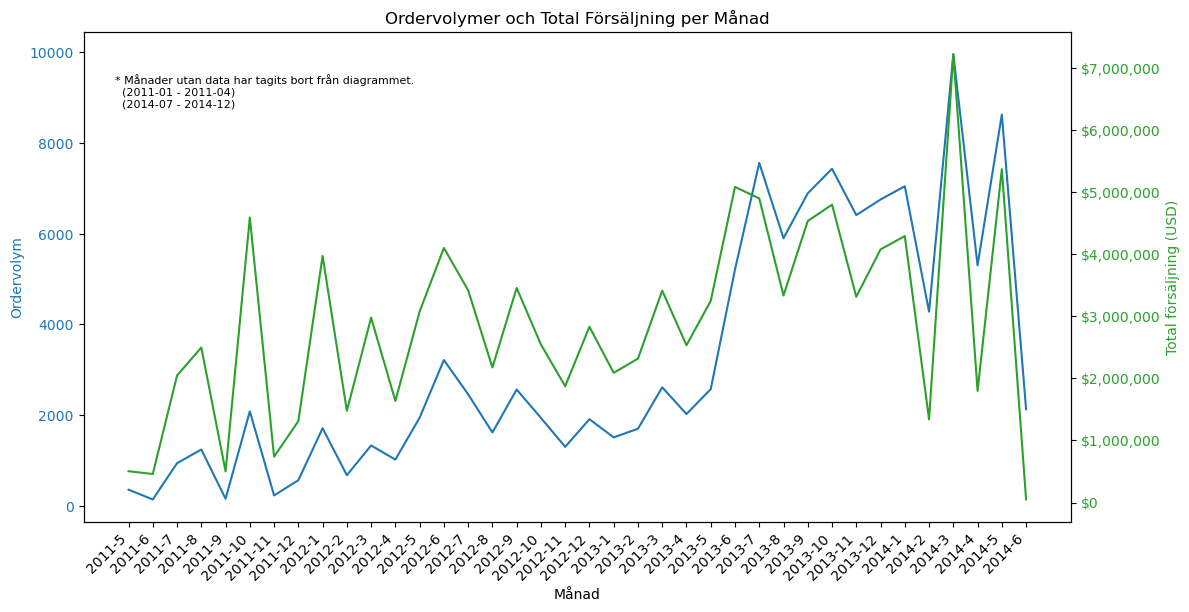

In [7]:
# SQL-fråga för att hämta ordervolymer och total försäljning
query_orders = """
SELECT 
    YEAR(OrderDate) AS OrderYear, 
    MONTH(OrderDate) AS OrderMonth, 
    COUNT(*) AS OrderCount, 
    SUM(LineTotal) AS TotalSales
FROM Sales.SalesOrderHeader
INNER JOIN Sales.SalesOrderDetail
    ON SalesOrderHeader.SalesOrderID = SalesOrderDetail.SalesOrderID
GROUP BY YEAR(OrderDate), MONTH(OrderDate)
ORDER BY OrderYear, OrderMonth;
"""

orders_data = pd.read_sql(query_orders, engine)

# Lista över alla månader från 2011-2014
date_range = pd.date_range(start='2011-01-01', end='2014-12-01', freq='MS')  # MS, månadsstart

full_date_range = pd.DataFrame(date_range, columns=['Month'])
full_date_range['OrderYear'] = full_date_range['Month'].dt.year
full_date_range['OrderMonth'] = full_date_range['Month'].dt.month

# Slå ihop komplett månadslista med orders_data, 0 där data saknas
# .merge() otroligt användsbart att slå joina dataframes 
# how='left' - tänk LEFT JOIN i SQL, där båda df har tabellerna OrderYear och OrderMonth
orders_data_full = pd.merge(full_date_range, orders_data, on=['OrderYear', 'OrderMonth'], how='left')

# Filtrera bort månader utan data
orders_data_full = orders_data_full[(orders_data_full['OrderCount'] > 0) | (orders_data_full['TotalSales'] > 0)]


fig, ax1 = plt.subplots(figsize=(12, 6))

# Ordervolym
ax1.set_xlabel('Månad')
ax1.set_ylabel('Ordervolym', color='tab:blue')
ax1.plot(orders_data_full['OrderYear'].astype(str) + '-' + orders_data_full['OrderMonth'].astype(str), 
         orders_data_full['OrderCount'], color='tab:blue', label='Order Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Total försäljning
ax2 = ax1.twinx()
ax2.set_ylabel('Total försäljning (USD)', color='tab:green')
ax2.plot(orders_data_full['OrderYear'].astype(str) + '-' + orders_data_full['OrderMonth'].astype(str), 
         orders_data_full['TotalSales'], color='tab:green', label='Total Sales')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # Formaterar till USD

# X-axelns tick-platser
ax1.set_xticks(range(len(orders_data_full)))
ax1.set_xticklabels(orders_data_full['OrderYear'].astype(str) + '-' + orders_data_full['OrderMonth'].astype(str), 
                    rotation=45, ha='right')

fig.tight_layout()

# Informationsruta, saknade månader
plt.figtext(0.10, 0.85, '* Månader utan data har tagits bort från diagrammet.\n  (2011-01 - 2011-04)\n  (2014-07 - 2014-12)', fontsize=8, color='black')

plt.title('Ordervolymer och Total Försäljning per Månad')
plt.show()


I grafen ovan står att se att det i datan saknas information om ett antal månader i början och slutet av tidsspannet. Exakt varför framgår ej av datan. Detta kan vara av av vikt vid analysen framgent. Databasens startdatum är 2011-05, vilket kan tyda på att den aktuella verksamheten startade upp då. Det finns även stora fluktuationer i både ordervolym och försäljning under 2014 och under 2014-06 störtdyker dessa, varefter det inte finns någon data. Detta kan tyda på en konkurs eller dylikt, men det framgår som sagt ej av datan.

## ANALYS: FÖR ÖKAD LÖNSAMHET

#### KONFIDENSINTERVALL
För att analysera tillförlitligheten i den aktuella datan används ett 95% konfidensintervall. Detta ger en god säkerhet kring vilka som är dom mest lönsamma produkterna då det säkerställs statistiskt.

#### DE 10 MEST LÖNSAMMA PRODUKTERNA

   ProductID              ProductName  MeanProfit  95% CI Low  95% CI High  \
0        782   Mountain-200 Black, 38   1793158.0   1791754.0    1794561.0   
1        783   Mountain-200 Black, 42   1746980.0   1745525.0    1748434.0   
2        779  Mountain-200 Silver, 38   1686933.0   1685422.0    1688444.0   
3        784   Mountain-200 Black, 46   1644899.0   1643377.0    1646422.0   
4        781  Mountain-200 Silver, 46   1590400.0   1588921.0    1591879.0   
5        780  Mountain-200 Silver, 42   1557901.0   1556433.0    1559369.0   
6        751         Road-150 Red, 48    470355.0    468101.0     472609.0   
7        749         Road-150 Red, 62    466320.0    464376.0     468265.0   
8        792         Road-250 Red, 58    453669.0    452824.0     454514.0   
9        795       Road-250 Black, 52    444734.0    444081.0     445388.0   

   StandardDeviation  StandardError  NumTransactions  
0            35835.0          716.0             2504  
1            36007.0          7

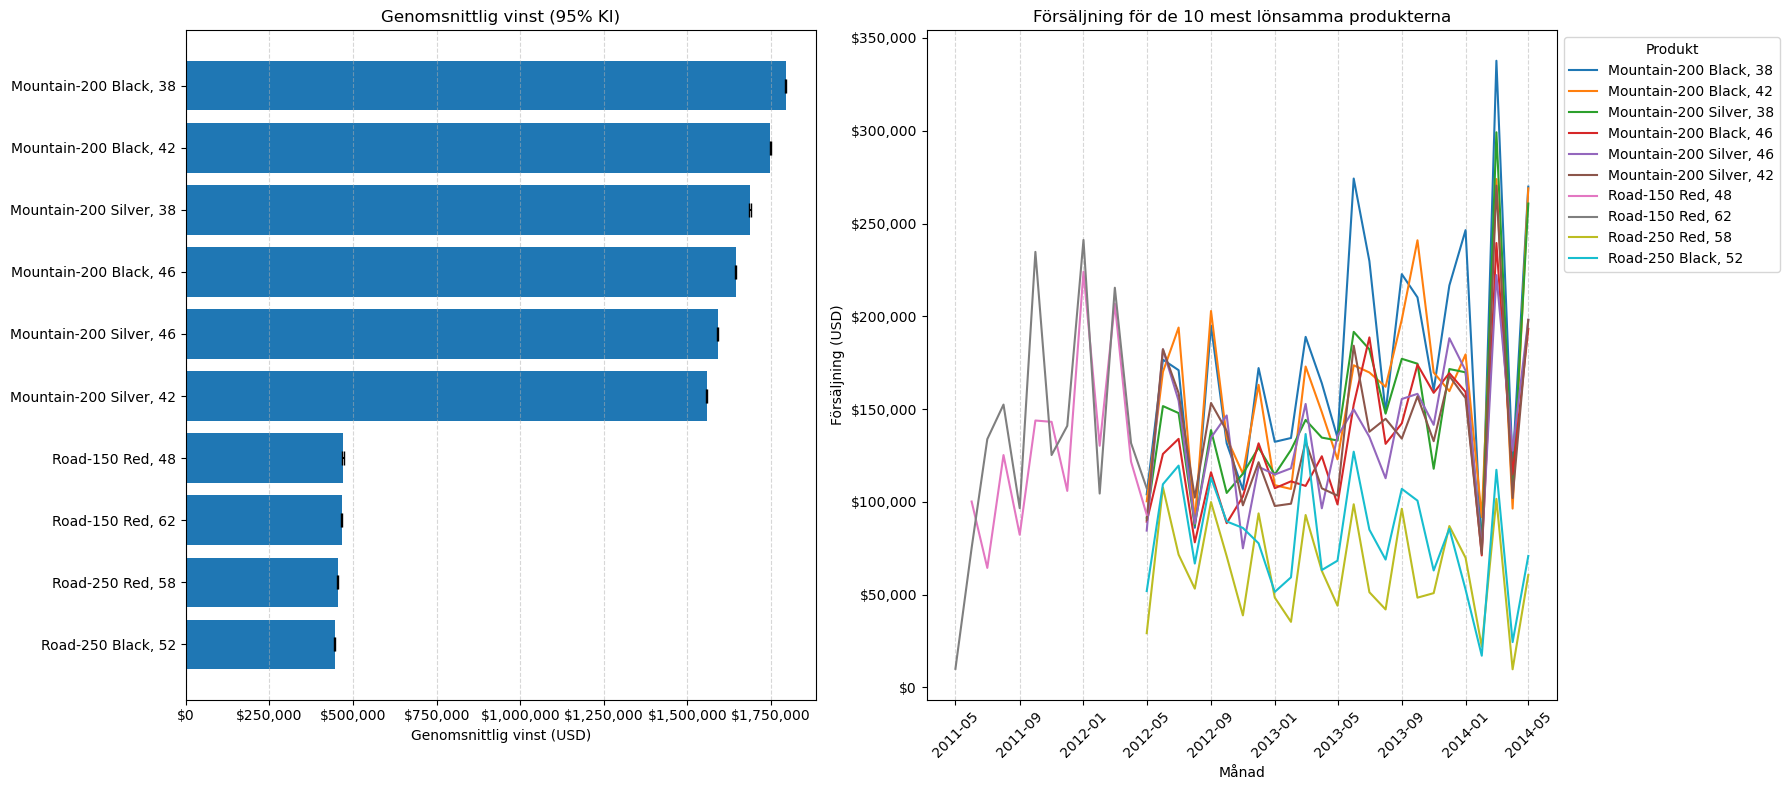

In [8]:
# SQL-query, 10 mest lönsamma produkterna
query = """
SELECT TOP 10
    p.ProductID AS ProductID,
    p.Name AS ProductName,
    SUM(sod.OrderQty * sod.UnitPrice) AS TotalRevenue,
    SUM(sod.OrderQty * pch.StandardCost) AS TotalCost,
    (SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * pch.StandardCost)) AS TotalProfit,
    COUNT(*) AS TransactionCount
FROM Sales.SalesOrderDetail AS sod
INNER JOIN Production.Product AS p 
    ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductCostHistory AS pch 
    ON sod.ProductID = pch.ProductID
INNER JOIN Sales.SalesOrderHeader AS soh
    ON sod.SalesOrderID = soh.SalesOrderID
WHERE p.Name IS NOT NULL 
GROUP BY p.ProductID, p.Name
ORDER BY TotalProfit DESC;
"""

# SQL-query, försäljning per månad
monthly_sales_query = """
SELECT 
    sod.ProductID,
    YEAR(soh.OrderDate) AS OrderYear,
    MONTH(soh.OrderDate) AS OrderMonth,
    SUM(sod.OrderQty * sod.UnitPrice) AS TotalRevenue
FROM Sales.SalesOrderDetail AS sod
INNER JOIN Sales.SalesOrderHeader AS soh
    ON sod.SalesOrderID = soh.SalesOrderID
GROUP BY sod.ProductID, YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY sod.ProductID, OrderYear, OrderMonth;
"""

data = pd.read_sql(query, engine)

# Hämta försäljning/månad
monthly_sales_data = pd.read_sql(monthly_sales_query, engine)

# Formatera år-månad
monthly_sales_data['YearMonth'] = (
    monthly_sales_data['OrderYear'].astype(str) + '-' +
    monthly_sales_data['OrderMonth'].astype(str).str.zfill(2)
)
monthly_sales_data['YearMonth'] = pd.to_datetime(monthly_sales_data['YearMonth'], format='%Y-%m')

# Index
data.set_index('ProductID', inplace=True)

# KI 95%
results = []
confidence_level = 0.95

for product_id, row in data.iterrows():
    product_name = row['ProductName']
    mean_profit = row['TotalProfit']
    n = row['TransactionCount']

    # Standardavvikelse
    # Approximation pga brist på detaljerad transaktionsdata, kan ha begränsningar i precisionen
    std_dev = row['TotalProfit'] / n ** 0.5
    std_error = std_dev / n ** 0.5

    # Konfidensintervall
    ci_low, ci_high = norm.interval(confidence_level, loc=mean_profit, scale=std_error)

    results.append({
        'ProductID': product_id,
        'ProductName': product_name,
        'MeanProfit': mean_profit,
        '95% CI Low': ci_low,
        '95% CI High': ci_high,
        'StandardDeviation': std_dev,
        'StandardError': std_error,
        'NumTransactions': n
    })

# Skapa dataframe
ci_df = pd.DataFrame(results)

# Avrunda närmsta heltal
ci_df = ci_df.round({'MeanProfit': 0, '95% CI Low': 0, '95% CI High': 0, 
                     'StandardDeviation': 0, 'StandardError': 0})

print(ci_df)

# Grid 1x2
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1: Genomsnittlig vinst, KI
axes[0].barh(ci_df['ProductName'], ci_df['MeanProfit'], 
             xerr=[ci_df['MeanProfit'] - ci_df['95% CI Low'], ci_df['95% CI High'] - ci_df['MeanProfit']], 
             capsize=5)
axes[0].set_xlabel('Genomsnittlig vinst (USD)')
axes[0].set_title('Genomsnittlig vinst (95% KI)')
axes[0].xaxis.set_major_formatter(FuncFormatter(currency_format))
axes[0].invert_yaxis()
axes[0].grid(True, axis='x', linestyle='--', alpha=0.5)

# 2: Försäljning per månad
for product_id in ci_df['ProductID']:
    product_data = monthly_sales_data[monthly_sales_data['ProductID'] == product_id]
    
    if not product_data.empty:
        axes[1].plot(product_data['YearMonth'], product_data['TotalRevenue'], label=ci_df.loc[ci_df['ProductID'] == product_id, 'ProductName'].values[0])
    else:
        print(f"Ingen data för produkt med ID: {product_id}")

axes[1].set_xlabel('Månad')
axes[1].set_ylabel('Försäljning (USD)')
axes[1].set_title('Försäljning för de 10 mest lönsamma produkterna')
axes[1].legend(title="Produkt", loc='upper left', bbox_to_anchor=(1, 1))
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)

axes[1].yaxis.set_major_formatter(FuncFormatter(currency_format))

plt.tight_layout()
plt.show()


I datan ovanför kan vi se att de sex överlägset mest lönsamma produkterna är Mountainbikes i samma variant, i svart eller silver och i olika storlekar. Efter dessa kommer landsvägscyklar i två olika varianter och flera storlekar. I diagram nummer två kan vi även se att försäljningen av samtliga cyklar i stor utsträckning följer varandras mönster över tid.

Konfidensintervallet ovan visar att det föreligger stora skillnader i standardavvikelse mellan produkter, vilket påverkar precisionen. Detta och andra faktorer, såsom hur brett eller smalt KI en produkt har, kan vara till stor hjälp som underlag vid beslutsfattande. Ett bredare KI tyder på större osäkerhet i datan, vilket troligtvis betyder större risk i den aktuella datan. Ett smalare KI betyder tvärtom att det är säkrare att anta att medelvärdet är representativt för hela populationen.

Beslut som lagerhantering, marknadsföring, med mera kan optimeras med KI som utgångspunkt. Stabila produkter ger pålitliga vinster, medan de produkter som har ett brett KI innebär en större osäkerhet och kräver åtgärder eller övervakning. Detta kan ske i form av anpassningar som prissättning och/eller förändrad marknadsföring för att minska risken.

#### KÖPMÖNSTER OCH ÖVERBLICK
Vidare undersöker jag kundernas köpmönster och total omsättning, vinst och produktpris per månad.

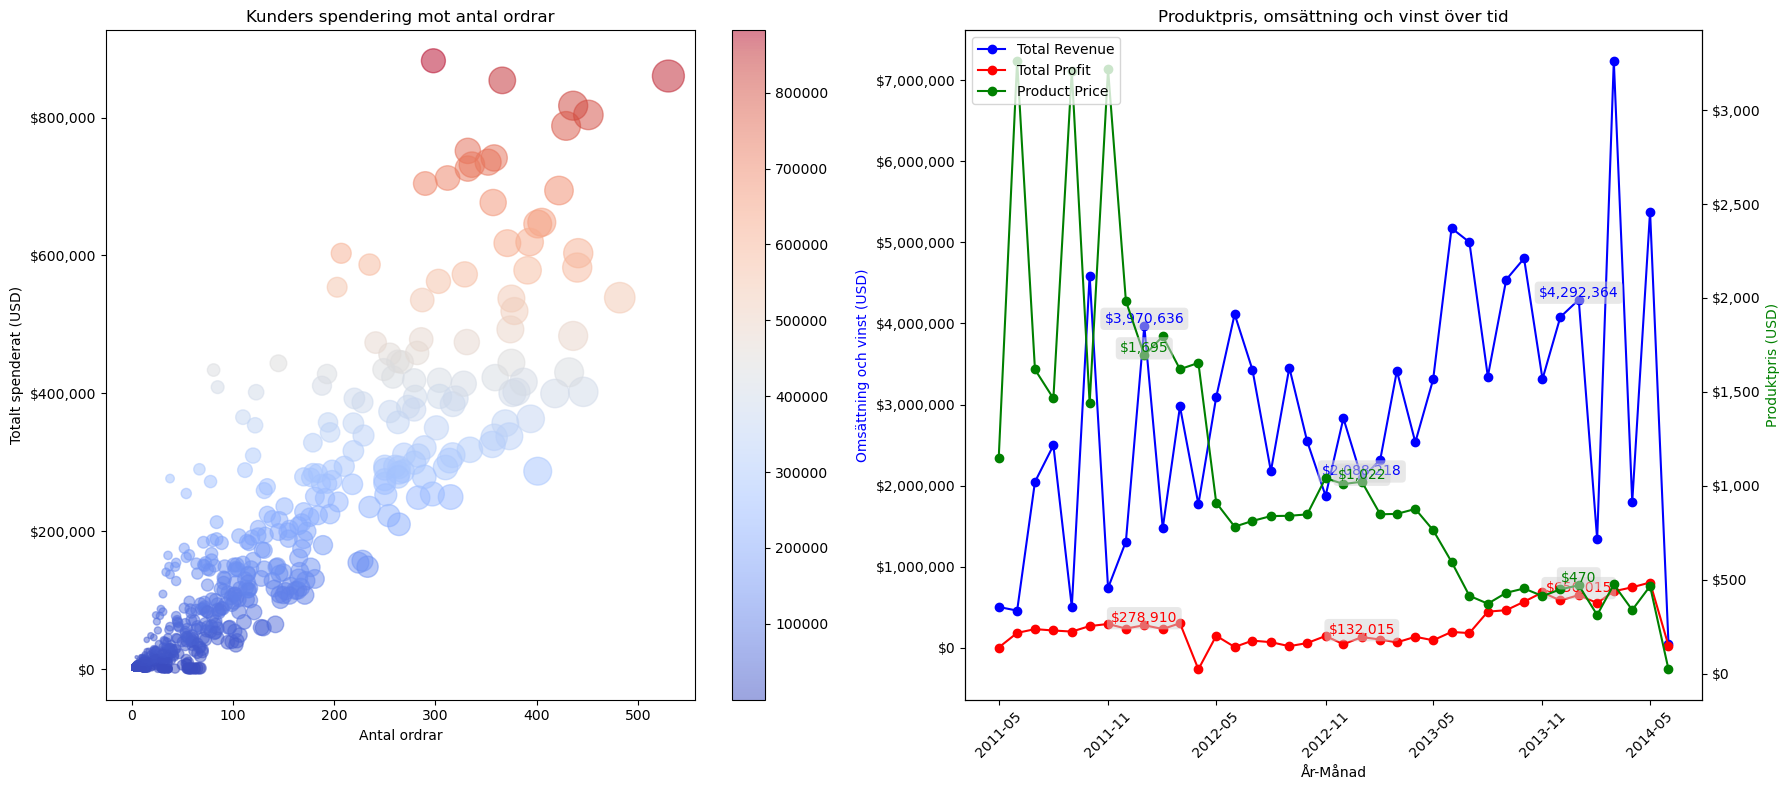

In [9]:
query_customer_data = """
SELECT 
    c.CustomerID,
    COUNT(soh.SalesOrderID) AS NumOrders,
    SUM(sod.OrderQty * sod.UnitPrice) AS TotalSpent
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Sales.Customer AS c ON soh.CustomerID = c.CustomerID
GROUP BY c.CustomerID
"""
customer_data = pd.read_sql(query_customer_data, engine)

# Grid för diagram
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Diagram 1: Kundernas spendering vs antal ordrar
scatter = axes[0].scatter(customer_data['NumOrders'], customer_data['TotalSpent'], s=customer_data['NumOrders'], alpha=0.5, c=customer_data['TotalSpent'], cmap='coolwarm')
axes[0].set_xlabel('Antal ordrar')
axes[0].set_ylabel('Totalt spenderat (USD)')
axes[0].set_title('Kunders spendering mot antal ordrar')
fig.colorbar(scatter, ax=axes[0])
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Diagram 2: Total omsättning, vinst och produktpris per månad
query = """
SELECT 
    YEAR(soh.OrderDate) AS OrderYear,
    MONTH(soh.OrderDate) AS OrderMonth,
    CONCAT(YEAR(soh.OrderDate), '-', MONTH(soh.OrderDate)) AS YearMonth,
    SUM(sod.OrderQty * sod.UnitPrice) AS TotalRevenue,
    SUM(sod.OrderQty * (sod.UnitPrice - p.StandardCost)) AS TotalProfit,
    AVG(p.ListPrice) AS ProductPrice
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
GROUP BY YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY YEAR(soh.OrderDate), MONTH(soh.OrderDate);
"""

price_data = pd.read_sql(query, engine)

# Konvertera YearMonth till datetime
price_data['YearMonth'] = pd.to_datetime(price_data['YearMonth'], format='%Y-%m')

ax = axes[1]
ax.plot(price_data['YearMonth'], price_data['TotalRevenue'], color='b', marker='o', label='Total Revenue')
for i, value in enumerate(price_data['TotalRevenue']):
    # Siffror endast för jan
    if price_data['YearMonth'][i].month == 1:
        ax.text(price_data['YearMonth'][i], value, f"${value:,.0f}", color='b', fontsize=10, ha='center', va='bottom', 
                bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

ax.plot(price_data['YearMonth'], price_data['TotalProfit'], color='r', marker='o', label='Total Profit')
for i, value in enumerate(price_data['TotalProfit']):
    # januari
    if price_data['YearMonth'][i].month == 1:
        ax.text(price_data['YearMonth'][i], value, f"${value:,.0f}", color='r', fontsize=10, ha='center', va='bottom', 
                bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

ax2 = ax.twinx()
ax2.plot(price_data['YearMonth'], price_data['ProductPrice'], color='g', marker='o', label='Product Price')
for i, value in enumerate(price_data['ProductPrice']):
    # januari
    if price_data['YearMonth'][i].month == 1:
        ax2.text(price_data['YearMonth'][i], value, f"${value:,.0f}", color='g', fontsize=10, ha='center', va='bottom', 
                 bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

ax.set_xlabel('År-Månad')
ax.set_ylabel('Omsättning och vinst (USD)', color='b')
ax2.set_ylabel('Produktpris (USD)', color='g')

# Formatera till USD
formatter = FuncFormatter(lambda x, pos: f'${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

ax.set_xticks(price_data['YearMonth'][::6])
ax.set_xticklabels([date.strftime('%Y-%m') for date in price_data['YearMonth'][::6]], rotation=45)

ax.set_title('Produktpris, omsättning och vinst över tid')

# Legend
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

Ur ovanstående resultat kan utläsas en tydlig korrelation mellan antal ordrar och totalt spenderade USD. Enstaka kunder utmärker sig genom högre eller lägre spendering men det huvudsakliga sambandet är slående. 
<br><br>
Den andra grafen visar ett intressant samband mellan produktprisets inverkan på både omsättning och vinst. Produktpriset är avsevärt lägre mot slutet av den undersökta tidsperioden, vilket i sin tur leder till högre omsättning och mer än fördubblad vinst.

#### PRODUKTKATEGORIER
Härefter undersöker jag produktkategorierna och hur de står sig gentemot varandra. Ett KI på 95% ger ett träffsäkert resultat på vinst och omsättning, och användning av t-test ger värdefull data om produktkategoriernas inbördes storlek.

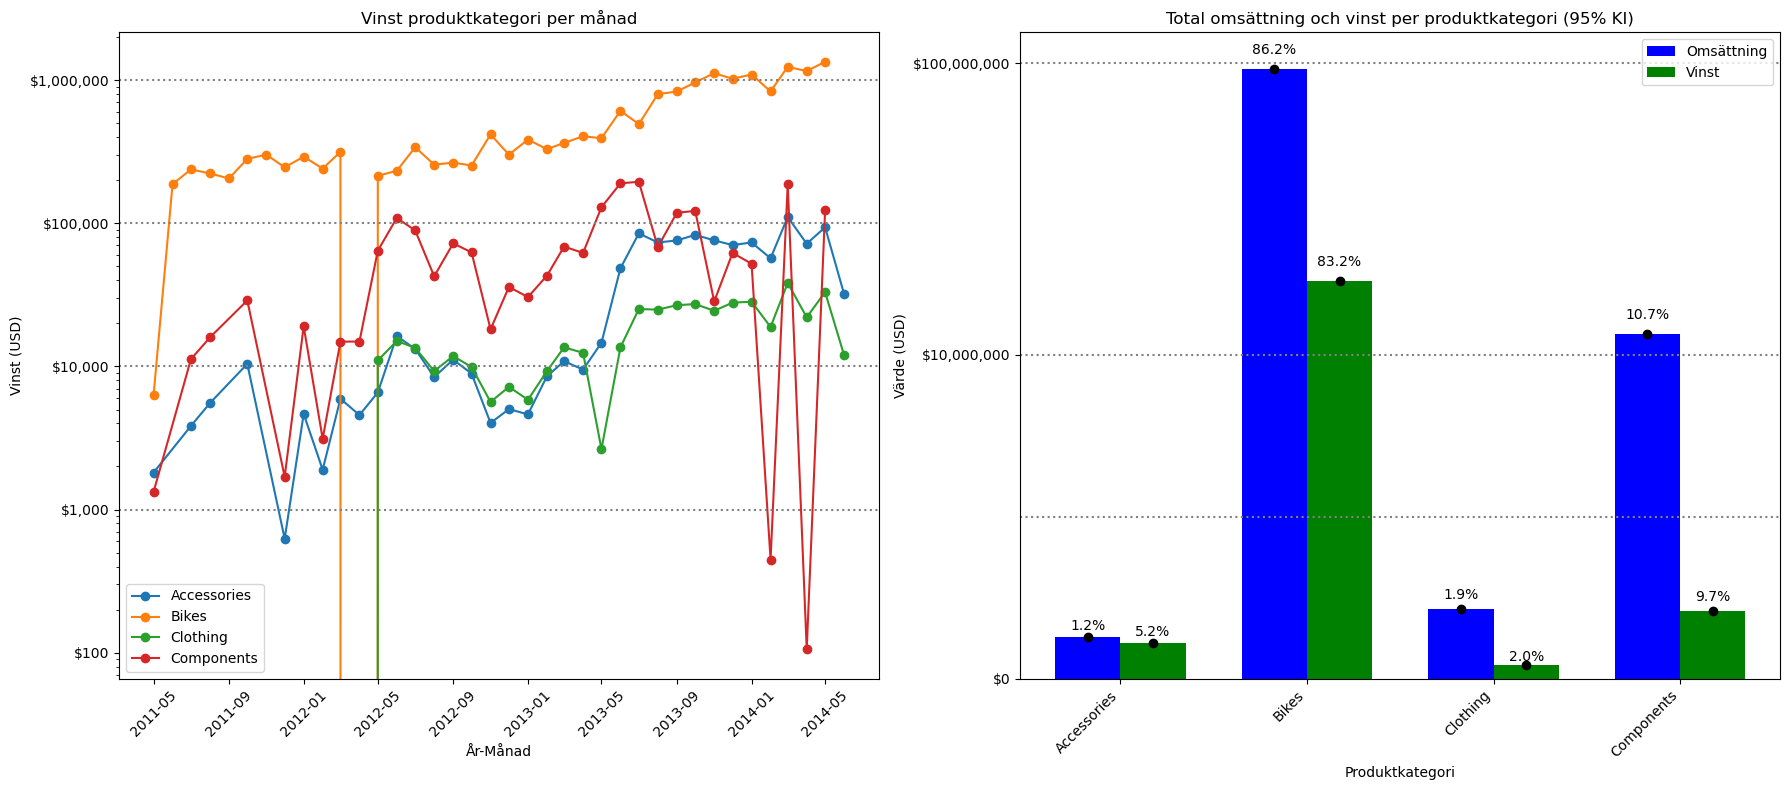

Vi inspekterar Accessories och Bikes:
T-statistic: -7.0609, P-value: 0.0000
Det finns en signifikant skillnad mellan Accessories och Bikes.
--------------------------------------------------
Vi inspekterar Accessories och Clothing:
T-statistic: 3.1769, P-value: 0.0022
Det finns en signifikant skillnad mellan Accessories och Clothing.
--------------------------------------------------
Vi inspekterar Accessories och Components:
T-statistic: -2.6471, P-value: 0.0101
Det finns en signifikant skillnad mellan Accessories och Components.
--------------------------------------------------
Vi inspekterar Bikes och Clothing:
T-statistic: 7.3917, P-value: 0.0000
Det finns en signifikant skillnad mellan Bikes och Clothing.
--------------------------------------------------
Vi inspekterar Bikes och Components:
T-statistic: 6.4643, P-value: 0.0000
Det finns en signifikant skillnad mellan Bikes och Components.
--------------------------------------------------
Vi inspekterar Clothing och Components:


In [10]:
# Separata querys för att säkerställa korrekt data (aggregationsnivåer)
Revenue_query = """
SELECT 
    pc.Name AS ProductCategory,
    YEAR(soh.OrderDate) AS OrderYear,
    SUM(sod.OrderQty * sod.UnitPrice) AS TotalRevenue
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
GROUP BY pc.Name, YEAR(soh.OrderDate)
ORDER BY OrderYear;
"""

Profit_query = """
SELECT 
    pc.Name AS ProductCategory,
    YEAR(soh.OrderDate) AS OrderYear,
    SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * pch.StandardCost) AS TotalProfit
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
INNER JOIN Production.ProductCostHistory AS pch ON p.ProductID = pch.ProductID
GROUP BY pc.Name, YEAR(soh.OrderDate)
ORDER BY OrderYear;
"""

revenue_data = pd.read_sql(Revenue_query, engine)
profit_data = pd.read_sql(Profit_query, engine)

# Slå ihop data
merged_data = pd.merge(revenue_data, profit_data, on=['ProductCategory', 'OrderYear'], how='outer') # Outer join

category_totals = merged_data.groupby('ProductCategory')[['TotalRevenue', 'TotalProfit']].sum().reset_index()

# KI för summan
def calculate_ci_for_sum(data, column):
    total = data[column].sum()
    mean = data[column].mean()
    std_dev = data[column].std()
    n = len(data)
    
    stderr_sum = std_dev * np.sqrt(n)

    ci_low, ci_high = stats.norm.interval(0.95, loc=total, scale=stderr_sum)

    return total, ci_low, ci_high


# Ny SQL-query, säkerställa rätt data per månad
Profit_query_monthly = """
SELECT 
    pc.Name AS ProductCategory,
    YEAR(soh.OrderDate) AS OrderYear,
    MONTH(soh.OrderDate) AS OrderMonth,
    SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * pch.StandardCost) AS TotalProfit
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
INNER JOIN Production.ProductCostHistory AS pch ON p.ProductID = pch.ProductID
GROUP BY pc.Name, YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY OrderYear, OrderMonth;
"""

profit_data_monthly = pd.read_sql(Profit_query_monthly, engine)

# Gruppera, skapa YearMonth och gör till datetime
profit_data_monthly['YearMonth'] = profit_data_monthly['OrderYear'].astype(str) + '-' + profit_data_monthly['OrderMonth'].astype(str).str.zfill(2)
monthly_totals = profit_data_monthly.groupby(['ProductCategory', 'YearMonth'])['TotalProfit'].sum().reset_index()
monthly_totals['YearMonth'] = pd.to_datetime(monthly_totals['YearMonth'], format='%Y-%m')
monthly_totals = monthly_totals.sort_values(by=['ProductCategory', 'YearMonth'])

# Grid 1x2
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Linjediagram
for category in monthly_totals['ProductCategory'].unique():
    category_sales = monthly_totals[monthly_totals['ProductCategory'] == category]
    axes[0].plot(category_sales['YearMonth'], category_sales['TotalProfit'], marker='o', label=category)

axes[0].set_xlabel('År-Månad')
axes[0].set_ylabel('Vinst (USD)')
axes[0].set_title('Vinst produktkategori per månad')

# Logaritmisk skala
axes[0].set_yscale('log')

# Formattera till USD
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

# Grid-linjer
log_benchmarks = [10**i for i in range(3, 7)]
for log_benchmark in log_benchmarks:
    axes[0].axhline(log_benchmark, color='grey', linestyle='dotted')

axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()


# 2. Stapeldiagram
bar_width = 0.35
x = np.arange(len(category_totals))

axes[1].bar(x - bar_width/2, category_totals['TotalRevenue'], width=bar_width, color='b', label='Omsättning')
axes[1].bar(x + bar_width/2, category_totals['TotalProfit'], width=bar_width, color='g', label='Vinst')

total_revenue_all = category_totals['TotalRevenue'].sum()
total_profit_all = category_totals['TotalProfit'].sum()

# Procentandelar på staplarna
for i, category in category_totals.iterrows():
    revenue_percentage = (category['TotalRevenue'] / total_revenue_all) * 100
    profit_percentage = (category['TotalProfit'] / total_profit_all) * 100

    # Justering av textens position
    revenue_position = category['TotalRevenue'] * 1.1
    profit_position = category['TotalProfit'] * 1.1  

    axes[1].text(x[i] - bar_width/2, revenue_position, f'{revenue_percentage:.1f}%', 
                 ha='center', va='bottom', color='black', fontsize=10)

    axes[1].text(x[i] + bar_width/2, profit_position, f'{profit_percentage:.1f}%', 
                 ha='center', va='bottom', color='black', fontsize=10)

# 95% KI
for i, category in category_totals.iterrows():
    revenue_data = category_totals[category_totals['ProductCategory'] == category['ProductCategory']]
    profit_data = category_totals[category_totals['ProductCategory'] == category['ProductCategory']]
    
    total_revenue, ci_low_revenue, ci_high_revenue = calculate_ci_for_sum(revenue_data, 'TotalRevenue')
    total_profit, ci_low_profit, ci_high_profit = calculate_ci_for_sum(profit_data, 'TotalProfit')

    # Felstaplar KI
    axes[1].errorbar(x[i] - bar_width/2, total_revenue, 
                     yerr=[[total_revenue - ci_low_revenue], [ci_high_revenue - total_revenue]], 
                     fmt='o', color='black', capsize=5)
    axes[1].errorbar(x[i] + bar_width/2, total_profit, 
                     yerr=[[total_profit - ci_low_profit], [ci_high_profit - total_profit]], 
                     fmt='o', color='black', capsize=5)

# Etiketter och tickar
axes[1].set_xticks(x)
axes[1].set_xticklabels(category_totals['ProductCategory'], rotation=45, ha='right')
axes[1].set_xlabel('Produktkategori')
axes[1].set_ylabel('Värde (USD)')
axes[1].set_title('Total omsättning och vinst per produktkategori (95% KI)')

# Symmetrisk logatirmisk skala över 10 miljoner
axes[1].set_yscale('symlog', linthresh=10_000_000)
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x:,.0f}'))

symlog_benchmarks = [5_000_000, 10_000_000, 100_000_000]
for symlog_benchmark in symlog_benchmarks:
    axes[1].axhline(symlog_benchmark, color='grey', linestyle='dotted')

axes[1].legend()

plt.tight_layout()
plt.show()

# T-test mellan produktkategorier
categories = merged_data['ProductCategory'].unique()

for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        category_1 = categories[i]
        category_2 = categories[j]
        
        # Vinstdata
        category_1_profit = monthly_totals[monthly_totals['ProductCategory'] == category_1]['TotalProfit']
        category_2_profit = monthly_totals[monthly_totals['ProductCategory'] == category_2]['TotalProfit']
        
        # T-test
        t_stat, p_value = ttest_ind(category_1_profit, category_2_profit)
        
        print(f"Vi inspekterar {category_1} och {category_2}:")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
        
        # Tolka
        if p_value < 0.05:
            print(f"Det finns en signifikant skillnad mellan {category_1} och {category_2}.")
        else:
            print(f"Det finns ingen signifikant skillnad mellan {category_1} och {category_2}.")
        print("-" * 50)

Ovanstående resultat visar med hjälp av t-test att det finns signifikanta skillnader mellan varje produktkategori i dess vinst och omsättning. Ett t-test jämför medelvärden mellan grupper för att avgöra om denna skillnad står att finna. Jag använder det här för att undersöka eventuella skillnader i omsättning och vinst mellan produktkategorierna, detta kan i sin tur hjälpa till att identifiera kategorier och produkter med högst potential för både lönsamhet och förbättring. Dessa insikter är helt avgörande vid prioritering av investeringar och strategiska åtgärder.

Med hjälp av logaritmiska skalor visualiseras detta effektivt, dels i vinst över tid och dels som total omsättning och vinst över den aktuella tidsperioden. Logaritmiska skalor tar höjd för extremvärden och kan öka läsbarheten i diagram markant. I datan ovan skiljer sig kategorierna brett åt, vilket gör att logaritmiska skalor hjälper till att förmedla ett överskådligt och jämför bart resultat.

Intressanta resultat står att finna i den andra grafen - där specifikt Accessories/Tillbehör endast står för 1,2% av omsättningen men för hela 5,2% av den totala vinsten. Här finns troligtvis stort utrymme för riktade åtgärder för att ytterligare öka vinsten. Att ta tillvara på sådana insikter kan leda till stor ökad lönsamhet i framtiden. Vi kan även se att underpresterande produktkategorier och territorier kan behöva ses över, till exempel kan kostnader behöva stramas åt eller utbudet minskas.


#### GEOGRAFI
Nedan undersöks den geografiska aspekten vad gäller omsättning och vinst.

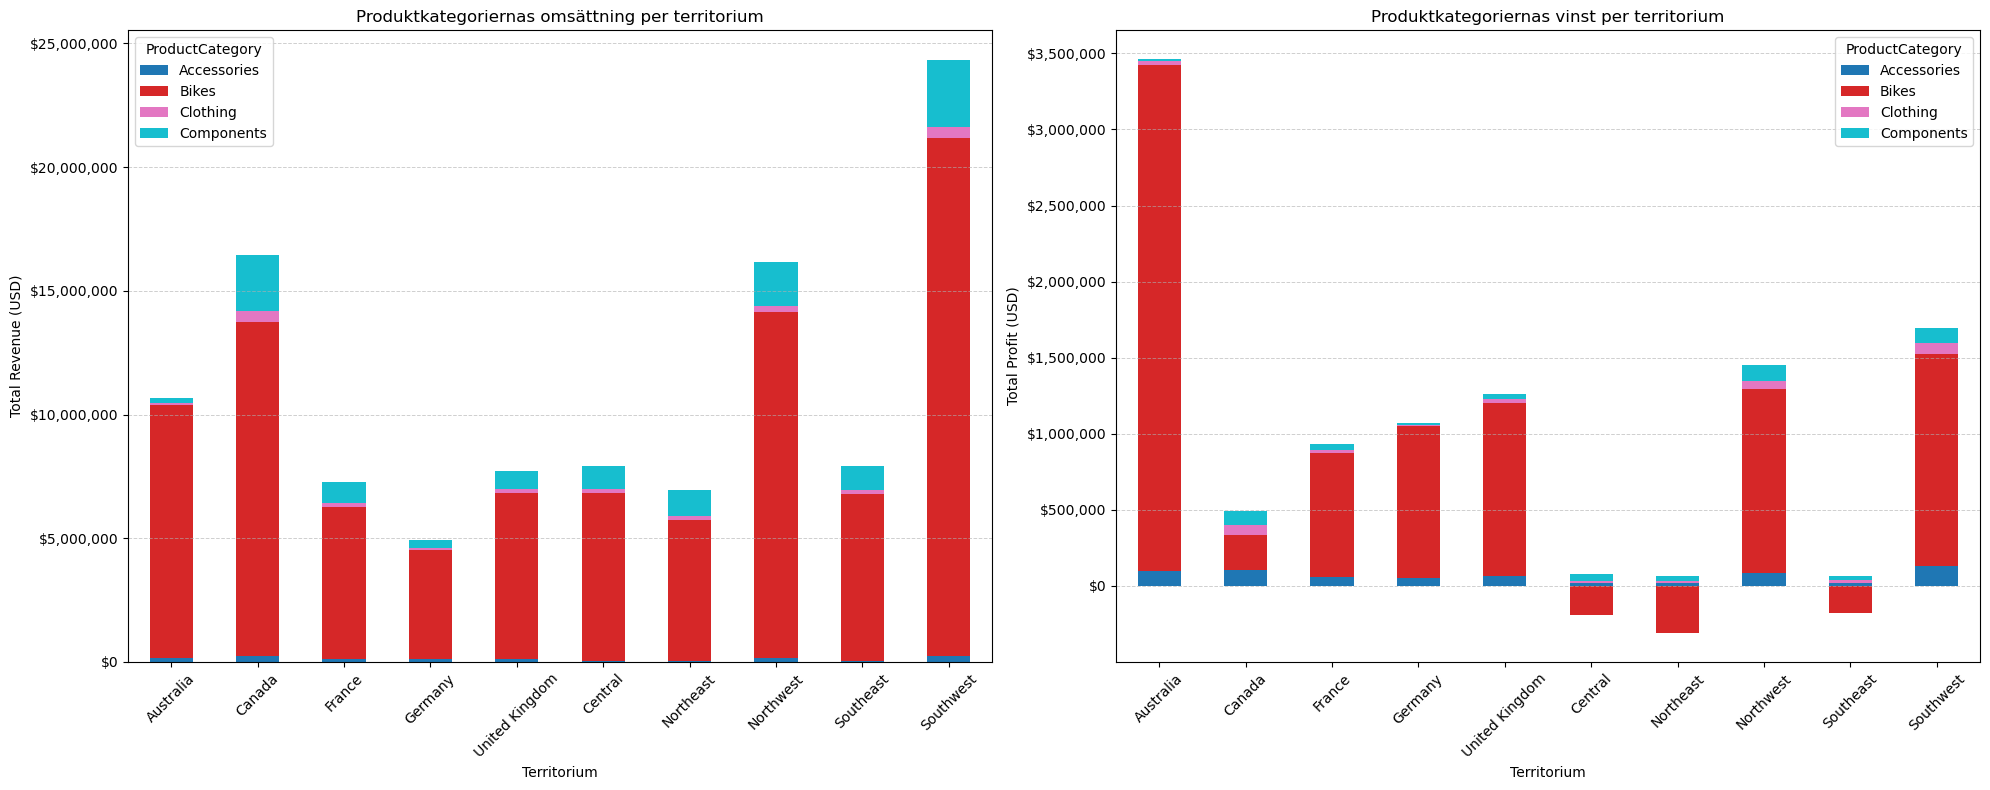

In [11]:
# Grid 1x2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Diagram 1: Försäljning per territorium
query_revenue = """
SELECT 
    st.Name AS TerritoryName,
    pc.Name AS ProductCategory,
    SUM(sod.OrderQty * sod.UnitPrice) AS CategoryRevenue,
    t.SalesYTD AS TotalTerritorySales
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
INNER JOIN Sales.SalesTerritory AS st ON soh.TerritoryID = st.TerritoryID
LEFT JOIN Sales.SalesTerritory AS t ON st.TerritoryID = t.TerritoryID
GROUP BY st.Name, pc.Name, t.SalesYTD
ORDER BY st.Name, CategoryRevenue DESC;
"""
data = pd.read_sql(query_revenue, engine)

# Pivotera data, för sortering
pivot_data = data.pivot(index='TerritoryName', columns='ProductCategory', values='CategoryRevenue').fillna(0)
total_sales = data[['TerritoryName', 'TotalTerritorySales']].drop_duplicates().set_index('TerritoryName')
pivot_data['TotalSales'] = total_sales['TotalTerritorySales']

# Sortera territorier, USA-regioner sist
us_territories = ['Northwest', 'Southwest', 'Central', 'Northeast', 'Southeast']
non_us = pivot_data.loc[~pivot_data.index.isin(us_territories)]
us = pivot_data.loc[pivot_data.index.isin(us_territories)]
pivot_data_sorted = pd.concat([non_us, us])

# Exkludera TotalSales från staplarna, endast kategoriernas data
pivot_data_sorted.drop('TotalSales', axis=1).plot(kind='bar', stacked=True, colormap='tab10', ax=ax1)

# Formattera, USD
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

# Grid-linjer
ax1.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Etiketter
ax1.set_xlabel('Territorium')
ax1.set_ylabel('Total Revenue (USD)')
ax1.set_title('Produktkategoriernas omsättning per territorium')
ax1.tick_params(axis='x', rotation=45)


# Diagram 2: vinst per produktkategori
query_profit = """
SELECT 
    st.Name AS TerritoryName,
    pc.Name AS ProductCategory,
    SUM(sod.OrderQty * sod.UnitPrice) AS CategoryRevenue,
    SUM(sod.OrderQty * p.StandardCost) AS CategoryCost,
    (SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * p.StandardCost)) AS CategoryProfit,
    t.SalesYTD AS TotalTerritorySales
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Production.ProductSubcategory AS ps ON p.ProductSubcategoryID = ps.ProductSubcategoryID
INNER JOIN Production.ProductCategory AS pc ON ps.ProductCategoryID = pc.ProductCategoryID
INNER JOIN Sales.SalesTerritory AS st ON soh.TerritoryID = st.TerritoryID
LEFT JOIN Sales.SalesTerritory AS t ON st.TerritoryID = t.TerritoryID
GROUP BY st.Name, pc.Name, t.SalesYTD
ORDER BY st.Name, CategoryProfit DESC;
"""

data = pd.read_sql(query_profit, engine)

# Gruppera data per territorium
total_profit = data.groupby('TerritoryName')['CategoryProfit'].sum()

# Sortera territorier, USA sist
pivot_data = data.pivot(index='TerritoryName', columns='ProductCategory', values='CategoryProfit').fillna(0)
non_us = pivot_data.loc[~pivot_data.index.isin(us_territories)]
us = pivot_data.loc[pivot_data.index.isin(us_territories)]
pivot_data_sorted = pd.concat([non_us, us])

# Stapel
pivot_data_sorted.plot(kind='bar', stacked=True, colormap='tab10', ax=ax2)

# Grid-linjer
ax2.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# USD
ax2.yaxis.set_major_formatter(formatter)

ax2.set_xlabel('Territorium')
ax2.set_ylabel('Total Profit (USD)')
ax2.set_title('Produktkategoriernas vinst per territorium')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Ovanstående staplar visar på extrema skillnader i försäljning och vinst i vissa regioner, där till exempel USA:s regioner Central, Northeast och Southeast alla går med förlust. Tyskland har lägre omsättning än alla dessa tre regioner, men har en stadig lönsamhet. Lönsamheten i Australien är otroligt hög, medan den i Canada och USA:s Southwest är osedvanligt låg i förhållande till regionernas totala omsättning. Att vidare undersöka sambandet mellan omsättning och vinst per region bör ge mycket intressant data som går att använda för att vidareutveckla företaget och lönsamheten. 

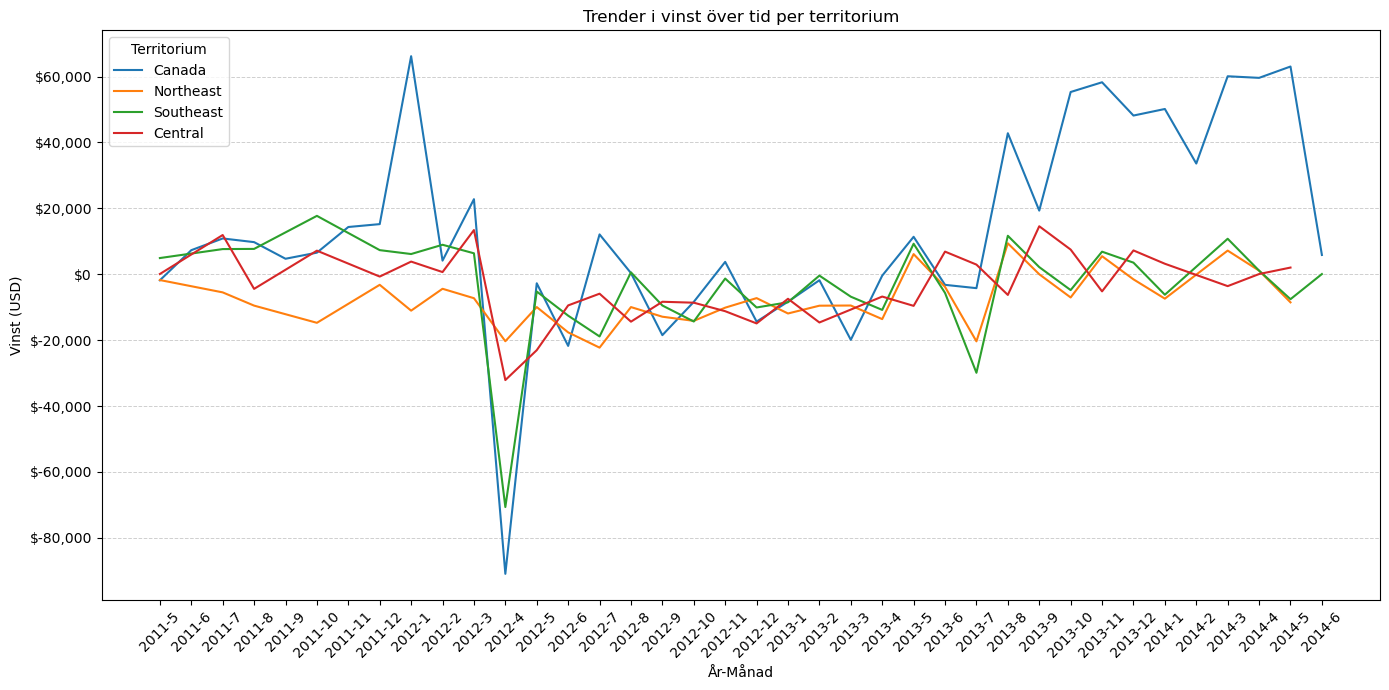

In [12]:
# SQL-query för tidsanalys
query_time_trends = """
SELECT 
    YEAR(soh.OrderDate) AS Year,
    MONTH(soh.OrderDate) AS Month,
    st.Name AS TerritoryName,
    SUM(sod.OrderQty * sod.UnitPrice) AS Revenue,
    SUM(sod.OrderQty * p.StandardCost) AS Cost,
    (SUM(sod.OrderQty * sod.UnitPrice) - SUM(sod.OrderQty * p.StandardCost)) AS Profit
FROM Sales.SalesOrderHeader AS soh
INNER JOIN Sales.SalesOrderDetail AS sod ON soh.SalesOrderID = sod.SalesOrderID
INNER JOIN Production.Product AS p ON sod.ProductID = p.ProductID
INNER JOIN Sales.SalesTerritory AS st ON soh.TerritoryID = st.TerritoryID
WHERE st.Name IN ('Canada', 'Northeast', 'Southeast', 'Central')
GROUP BY YEAR(soh.OrderDate), MONTH(soh.OrderDate), st.Name
ORDER BY Year, Month;
"""

time_trends_data = pd.read_sql(query_time_trends, engine)
time_trends_data.head()

# Tidsserie för vinst per region
fig, ax = plt.subplots(figsize=(14, 7))

# Formattera efter År-Månad
for territory in time_trends_data['TerritoryName'].unique():
    territory_data = time_trends_data[time_trends_data['TerritoryName'] == territory]
    ax.plot(territory_data['Year'].astype(str) + '-' + territory_data['Month'].astype(str),
            territory_data['Profit'], label=territory)

# Etiketter
ax.set_title('Trender i vinst över tid per territorium')
ax.set_xlabel('År-Månad')
ax.set_ylabel('Vinst (USD)')
ax.legend(title='Territorium')
ax.tick_params(axis='x', rotation=45)

# Grid-linjer
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# USD
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Med ovanstående data synliggörs att samtliga undersökta territorier generellt har legat under lönsamhetsgränsen under en stor del av tidsspannet, med undantag för Kanada som gjorde stora vinster under sommaren 2013 och framåt.

#### ANSTÄLLDA - ÅLDER, KÖN och LÖN

I nedanstående stycke undersöks företagets anställda. En jämförelse mellan de olika departementen ger värdefulla insikter i könsfördelning, timlön och genomsnittlig ålder. Sist i segmentet görs en undersökning om lönegapet i företaget - det vill säga hur mycket mäns och kvinnors lön skiljer sig åt. Detta är intressant ur ett jämställdhetsperspektiv då kvinnors löner fortfarande systematiskt och konsekvent ligger lägre än mäns för samma kvalifikationer och yrke.

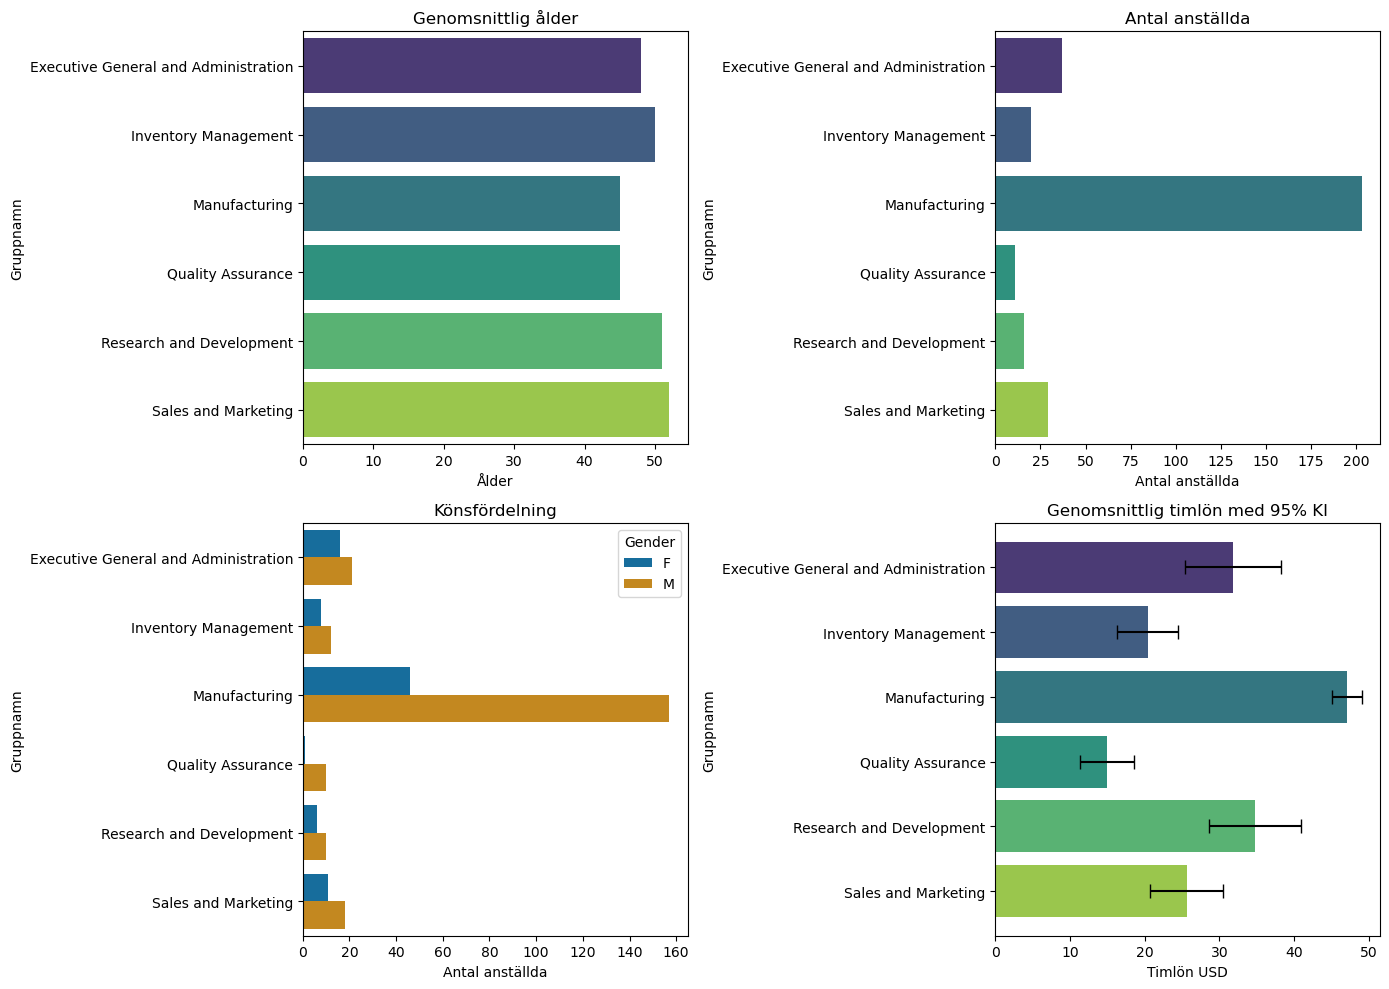

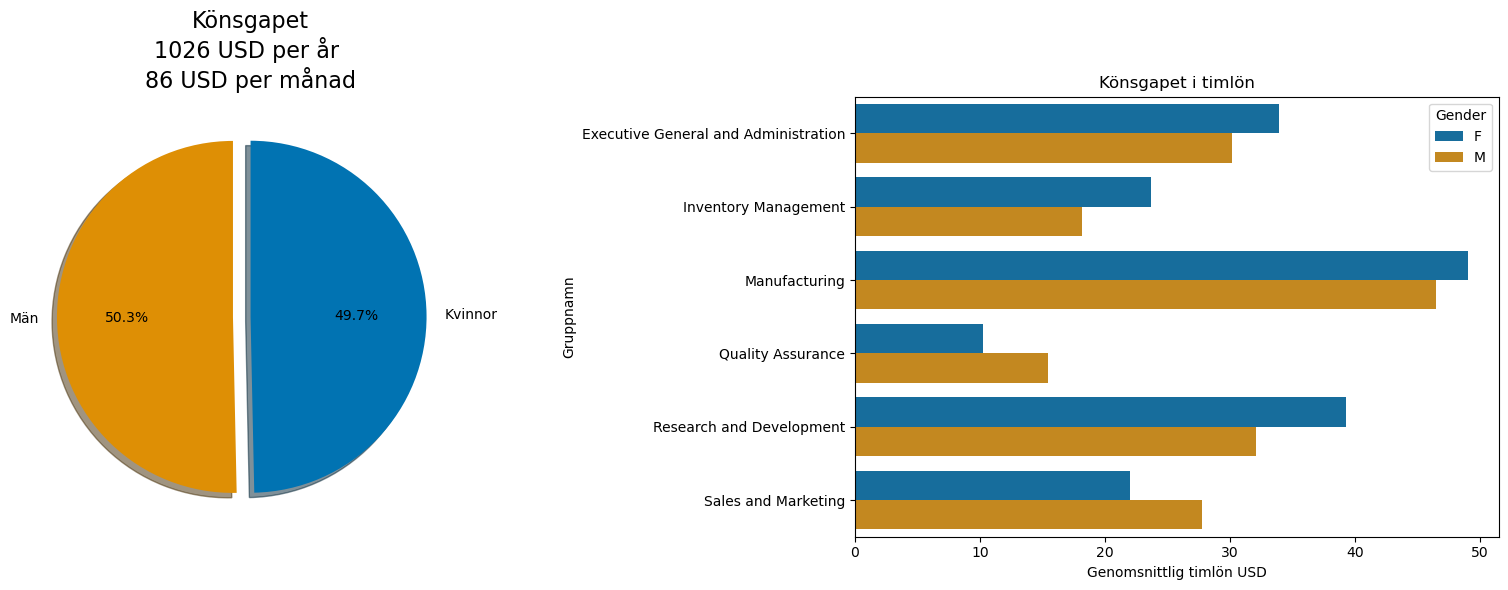

In [ ]:
# SQL-query, jobbtitel, ålder, kön, avdelning, lön
# EndDate IS NULL = pågående anställning
sql_query = """
SELECT 
    JobTitle, 
    DATEDIFF(YEAR, BirthDate, GETDATE()) AS Age, 
    Gender, 
    d.Name AS Department, 
    d.GroupName,
    eph.Rate,
    eph.PayFrequency
FROM HumanResources.Employee e
INNER JOIN Person.Person p ON e.BusinessEntityID = p.BusinessEntityID
INNER JOIN HumanResources.EmployeeDepartmentHistory edh ON e.BusinessEntityID = edh.BusinessEntityID
INNER JOIN HumanResources.Department d ON edh.DepartmentID = d.DepartmentID
INNER JOIN HumanResources.EmployeePayHistory eph ON e.BusinessEntityID = eph.BusinessEntityID
WHERE edh.EndDate IS NULL
"""

data = pd.read_sql(sql_query, engine)

# Funktion, justera lönen till månadsinkomst
def adjust_monthly_salary(row):
    if row['PayFrequency'] == 1:  # Veckolön (1 innebär veckolön)
        return (row['Rate'] * 52) / 12  # Omvandla till månadsinkomst
    elif row['PayFrequency'] == 2:  # Månadslön
        return row['Rate']  # Behåll månadslönen som den är
    else:
        return None

# Justera lönerna till månadsinkomst
data['SalaryRate'] = data.apply(adjust_monthly_salary, axis=1)

# Gruppera och beräkna medelåldern, avrunda till heltal
grouped_data = data.groupby('GroupName')['Age'].mean().reset_index()
grouped_data['Age'] = grouped_data['Age'].round().astype(int)

gender_distribution = data.groupby(['GroupName', 'Gender']).size().unstack(fill_value=0)

group_count = data.groupby('GroupName').size().reset_index(name='Count')

# Beräkna genomsnittlig månadsinkomst och statistik
salary_stats = data.groupby('GroupName')['SalaryRate'].agg(['mean', 'std', 'count']).reset_index()

# Z-värde för 95% konfidensintervall
z_value = stats.norm.ppf(0.975)  # För 95% CI

# Beräkna konfidensintervall (CI)
salary_stats['CI_low'] = salary_stats['mean'] - z_value * (salary_stats['std'] / np.sqrt(salary_stats['count']))
salary_stats['CI_high'] = salary_stats['mean'] + z_value * (salary_stats['std'] / np.sqrt(salary_stats['count']))

# Slå ihop medelålder, antal anställda och genomsnittlig lön
grouped_data = grouped_data.merge(group_count, on='GroupName')
grouped_data = grouped_data.merge(salary_stats[['GroupName', 'mean', 'CI_low', 'CI_high']], on='GroupName')

# Omvandla könsfördelning till långformat, för visualisering
gender_distribution_long = gender_distribution.reset_index().melt(id_vars='GroupName', 
                                                                value_vars=gender_distribution.columns,
                                                                var_name='Gender', value_name='Count')

# Konsekvent färgpalett för kön
gender_colors = sns.color_palette('colorblind', n_colors=2)
gender_color_mapping = {'M': gender_colors[1], 'F': gender_colors[0]}

plt.figure(figsize=(14, 10))

# Sub1: Medelålder
plt.subplot(2, 2, 1)
sns.barplot(x='Age', y='GroupName', data=grouped_data, palette='viridis', hue='GroupName')
plt.title('Genomsnittlig ålder')
plt.xlabel('Ålder')
plt.ylabel('Gruppnamn')

# Sub2: Antal anställda
plt.subplot(2, 2, 2)
sns.barplot(x='Count', y='GroupName', data=grouped_data, palette='viridis', hue='GroupName')
plt.title('Antal anställda')
plt.xlabel('Antal anställda')
plt.ylabel('Gruppnamn')

# Sub3: Könsfördelning
plt.subplot(2, 2, 3)
sns.barplot(x='Count', y='GroupName', hue='Gender', data=gender_distribution_long, palette=gender_color_mapping)
plt.title('Könsfördelning')
plt.xlabel('Antal anställda')
plt.ylabel('Gruppnamn')

# Sub4: Genomsnittlig timlön med KI
plt.subplot(2, 2, 4)
sns.barplot(x='mean', y='GroupName', data=salary_stats, palette='viridis', hue='GroupName')

# Lägg till felstaplar för konfidensintervallet
plt.errorbar(x=salary_stats['mean'], y=salary_stats['GroupName'], 
             xerr=[salary_stats['mean'] - salary_stats['CI_low'], salary_stats['CI_high'] - salary_stats['mean']], 
             fmt='none', color='black', capsize=5)

plt.title('Genomsnittlig timlön med 95% KI')
plt.xlabel('Timlön USD')
plt.ylabel('Gruppnamn')

plt.tight_layout()
plt.show()

# Beräkna årslön kön
male_data = data[data['Gender'] == 'M']
female_data = data[data['Gender'] == 'F']

hours_per_month = 160

male_annual_salary = male_data['SalaryRate'].mean() * hours_per_month * 12
female_annual_salary = female_data['SalaryRate'].mean() * hours_per_month * 12

# Beräkna könsgapet, utan decimaler
annual_gap = round(male_annual_salary - female_annual_salary)
monthly_gap = round(annual_gap / 12)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Sub1: Könsgapet per år
labels = ['Män', 'Kvinnor']
sizes = [male_annual_salary, female_annual_salary]

ax[0].pie(sizes, labels=labels, colors=[gender_color_mapping['M'], gender_color_mapping['F']], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), shadow=True)
ax[0].set_title(f'Könsgapet\n{annual_gap} USD per år \n{monthly_gap} USD per månad', fontsize=16)

# Sub2: Könsgapet i lön
gender_salary_gap = data.groupby(['GroupName', 'Gender'])['SalaryRate'].mean().reset_index()

# Explicit färgkoppling
sns.barplot(x='SalaryRate', y='GroupName', hue='Gender', data=gender_salary_gap, palette=gender_color_mapping, ax=ax[1])

ax[1].set_title('Könsgapet i timlön')
ax[1].set_xlabel('Genomsnittlig timlön USD')
ax[1].set_ylabel('Gruppnamn')

plt.tight_layout()
plt.show()


Ovanstående data synliggör en intressant bild, där kvinnor i stor utsträckning har en något högre timlön än män. Lönegapet förblir dock stort på grund av snedvridningen av kön i manufacturing-departementet, som till 3/4 består av män och även är den överlägset mest välbetalda gruppen. I slutändan landar företagets sammanlagda lönegap på över 10.000 SEK om året, en siffra som kan vara intressant att ha i åtanke vid framtida rekryteringar och löneförhandlingar för att porträttera en bild av en modern arbetsplats med rättvisa villkor för arbetarna. En aspekt som blir viktigare för varje år.

## Executive Summary

Min analys av databasen AdventureWorks2022 har kommit fram till följande insikter:

1. **Dataöversikt**: AdventureWorks2022 innehåller ett brett spektrum av data relaterade till anställda, kunder, produkter och försäljning. Datan är strukturerad i ett logiskt och effektivt system, vilket gör den lätt att arbeta med.
2. **Försäljningstrender**: De mest sålda produkterna genererar en betydande del av företagets intäkter. Stapeldiagram visualiserar detta på ett överskådligt sätt.
3. **Kundfördelning**: Majoriteten av kunderna är lokaliserade i vissa regioner, vilket möjliggör riktade marknadsföringskampanjer och maximera försäljningen i dessa områden.
4. **Statistisk analys**: Ett 95% konfidensintervall för genomsnittlig försäljning per produkt indikerar att företaget kan förvänta sig stabila intäkter inom specifika produktkategorier.
5. **Rekommendationer**: Företaget bör investera ytterligare på regioner och produkter som är högpresterande. Det rekommenderas även att vidta åtgärder i regioner där vinsten är negativ, trots god försäljning.

Dessa insikter kan bidra till att optimera företagets affärsstrategier och förbättra långsiktig lönsamhet.


## Självutvärdering

De två stora utmaningarna i mitt arbete med denna rapport var dels kodandet i sig, där jag var tvungen att lära mig många nya uttryck för att förverkliga det jag ville framföra. Dels att ta fram relevant data och göra medvetna val i en så pass stor datamängd som i denna databas. Båda dessa anser jag att jag har lyckats bra med under arbetets gång, med en ständig påminnelse om **vad** det är jag gör. 

Det var stundtals svårt att välja ut vilka parametrar som var av intresse för rapporten, då datans storlek gjorde det omöjligt att ha med all information och jag var tvungen att prioritera och göra aktiva val utifrån mitt huvudfokus i analysen, som var försäljningsverksamheten, omsättning och vinst. Jag har blivit mycket klokare på både Python-kod och SQL eftersom rapporten stundtals krävde mer avancerade funktioner och kodsnuttar än vad jag tidigare har skrivit. Till min hjälp har jag haft både kurslitteratur om SQL och Python, och diskussioner med generativ AI såsom ChatGPT om fördelar och nackdelar med olika sätt att angripa problemen på. Även Microsofts SQL Server Technical Documentation och Python docs online har varit till stor hjälp vid sökning efter nya funktioner och syntax.

Jag har i denna rapport strävat efter att uppnå VG-nivå. Genom att ge en deskriptiv sammanfattning över databasen i fråga med flera visualiseringar och exempel utifrån datan får läsaren en god överblick över innehållet i databasen. Vidare har jag gjort en gedigen statistisk analys med huvudfokus på de mest lönsamma produkterna, samt hur denna lönsamhet genereras utifrån olika parametrar. En geografisk analys visade sig vara av stort värde för att vidare förstå marknaden och regionernas vitt skilda nettomarginaler.

Jag gjorde min muntliga redovisning 2025-01-03.

Med vänliga hälsningar,
Martin Blomqvist